In [16]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

from xray_binary_utils.constants import SUN_IN_AU
from xray_binary_utils.stellar import STELLAR_TYPES
from xray_binary_utils.compas_utils import run_compas, open_output, open_detailed_output, remove_output

## Run simulation

In [7]:
run_compas(100)

## Get stellar types

In [27]:
def open_run_summary() -> h5py.File:
    filename = "COMPAS_Output/COMPAS_Output.h5"
    f = h5py.File(filename, "r")

    return f

def open_detailed_run_summary(run_index: int = 0) -> h5py.File:
    filename = f'COMPAS_Output/Detailed_Output/BSE_Detailed_Output_{run_index}.h5'
    f = h5py.File(filename, "r")
    
    return f

def remove_summary():
    os.system('rm -rf COMPAS_Output')

In [8]:
def get_stellar_types(file: h5py.File) -> np.array:
    return [file['BSE_System_Parameters'][f'Stellar_Type(1)'][:], file['BSE_System_Parameters'][f'Stellar_Type(2)'][:]]

def get_percent_of_stellar_types(file: h5py.File, stellar_type: int, stellar_index: int = 1) -> float:
    stellar_types: np.array = get_stellar_types(file, stellar_index)
    return float(len(stellar_types[stellar_types==stellar_type]))/float(len(stellar_types))

## Histogram of stellar objects

In [10]:
general_summary = open_output()

In [11]:
all_types: np.array = np.concatenate([general_summary['BSE_System_Parameters']['Stellar_Type(1)'][:],
                                      general_summary['BSE_System_Parameters']['Stellar_Type(2)'][:]])

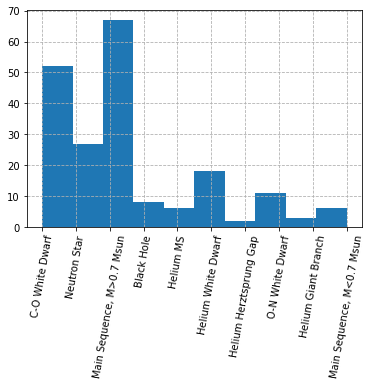

In [17]:
plt.hist([STELLAR_TYPES[t] for t in all_types])
plt.xticks(rotation='80');
plt.grid(linestyle='--');

## Total neutron star count over time

In [29]:
semi_major_axes = general_summary['BSE_System_Parameters'][f'SemiMajorAxis@ZAMS'][:]
stellar_masses1 = general_summary['BSE_System_Parameters'][f'Mass@ZAMS(1)'][:]
stellar_masses2 = general_summary['BSE_System_Parameters'][f'Mass@ZAMS(2)'][:]
stellar_types1 = general_summary['BSE_System_Parameters'][f'Stellar_Type(1)'][:]
stellar_types2 = general_summary['BSE_System_Parameters'][f'Stellar_Type(2)'][:]

In [30]:
mass_ratios = []
total_masses = []

for sm1, sm2 in zip(stellar_masses1, stellar_masses2):
    ratio = sm1/sm2 if sm1<sm2 else sm2/sm1
    mass_ratios.append(ratio)
    total_masses.append(sm1+sm2)

In [31]:
import plotly.express as px
import plotly
import numpy as np

plotly.offline.init_notebook_mode(connected=True)

In [33]:
def merger_msg(merger: bool) -> str:
    return 'Yes' if merger else 'No'

stellar_types = [STELLAR_TYPES[int(max(sm1, sm2))] for sm1, sm2 in zip(stellar_types1, stellar_types2)]
mergers = [merger_msg(m) for m in general_summary['BSE_System_Parameters']['Merger'][:]]

In [36]:
fig = px.scatter(x=semi_major_axes, y=mass_ratios, size=total_masses, color=stellar_types,
                 hover_name=stellar_types,
                 hover_data={
                     'Semi-major axis': semi_major_axes,
                     'Total mass': total_masses,
                     'Merger': mergers
                 })
fig.update_xaxes(title="Semi-major axis [Rsun]")
fig.update_yaxes(title="Mass ratio")

In [38]:
remove_output()